In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pertpy as pt
import warnings
import pickle as pkl
from matplotlib import rcParams
FIGSIZE=(3,3)
rcParams['figure.figsize']=FIGSIZE

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

To use sccoda or tasccoda please install ete3 with pip install ete3

In [2]:
with open("/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/dino_featurization_project/scib/rxrx1.pkl", "rb") as bm_file:
    bm = pkl.load(bm_file)

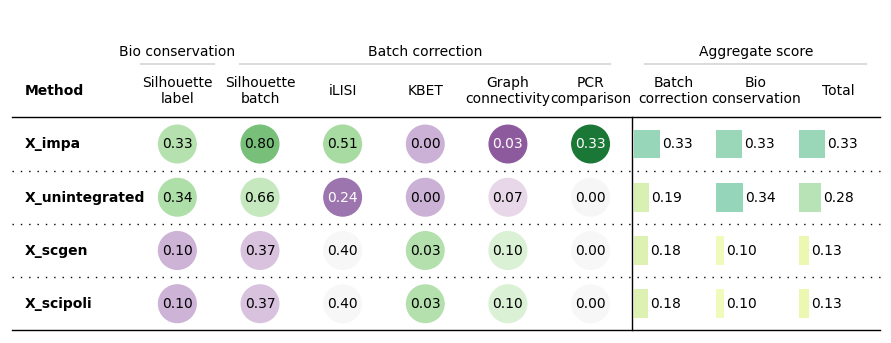

In [3]:
bm.plot_results_table(min_max_scale=False)

In [7]:
df = bm.get_results(min_max_scale=False)
df

,Silhouette label,Silhouette batch,iLISI,KBET,Graph connectivity,PCR comparison,Batch correction,Bio conservation,Total
Embedding,,,,,,,,,
X_scgen,0.097313,0.367302,0.39958,0.033045,0.096746,0.000007,0.179336,0.097313,0.130122
X_scipoli,0.097313,0.367302,0.39958,0.033045,0.096746,0.000007,0.179336,0.097313,0.130122
X_unintegrated,0.337439,0.6646,0.240081,0.0,0.068822,0,0.1947,0.337439,0.280344
X_impa,0.330182,0.79835,0.507487,0.0,0.032839,0.326898,0.333115,0.330182,0.331355
Metric Type,Bio conservation,Batch correction,Batch correction,Batch correction,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score


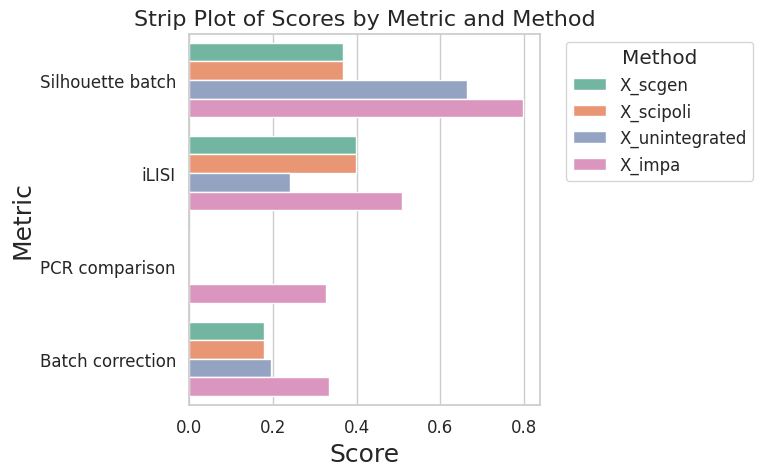

In [21]:
# Your DataFrame
data = {
    'Silhouette batch': [0.367302, 0.367302, 0.6646, 0.79835],
    'iLISI': [0.39958, 0.39958, 0.240081, 0.507487],
    'KBET': [0.033045, 0.033045, 0.0, 0.0],
    'Graph connectivity': [0.096746, 0.096746, 0.068822, 0.032839],
    'PCR comparison': [0.000007, 0.000007, 0, 0.326898],
    'Batch correction': [0.179336, 0.179336, 0.1947, 0.333115],
}

index = ['X_scgen', 'X_scipoli', 'X_unintegrated', 'X_impa']
columns = ['Silhouette batch', 'iLISI', 'PCR comparison', 'Batch correction']

df = pd.DataFrame(data, index=index, columns=columns)

# Transpose the DataFrame
df_transposed = df

# Reshape the DataFrame for stripplot
df_melted = df_transposed.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')

# Set aesthetic parameters
sns.set(style='whitegrid', font_scale=1.2)

# Plotting with Seaborn - Horizontal Point plot (Swarm plot)
plt.figure(figsize=(8, 5))
palette = sns.color_palette("Set2")  # Choose a suitable color palette
# sns.stripplot(data=df_melted, y='Metric', x='Score', hue='index', palette=palette, dodge=True, jitter=True, size=14)  # Increase size here
sns.barplot(data=df_melted, y='Metric', x='Score', hue='index', palette=palette)  # Increase size here
plt.title('Strip Plot of Scores by Metric and Method', fontsize=16)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Metric', fontsize=18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Place legend outside the plot
plt.legend(title='Method', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()